# Sign-to-Sign/Sign-to-Text Service Demo

## This demo will showcase how to use the One Touch Sign-to-Sign & Sign-to-Text to enable sign language translation into both text and another sign language from a different country.

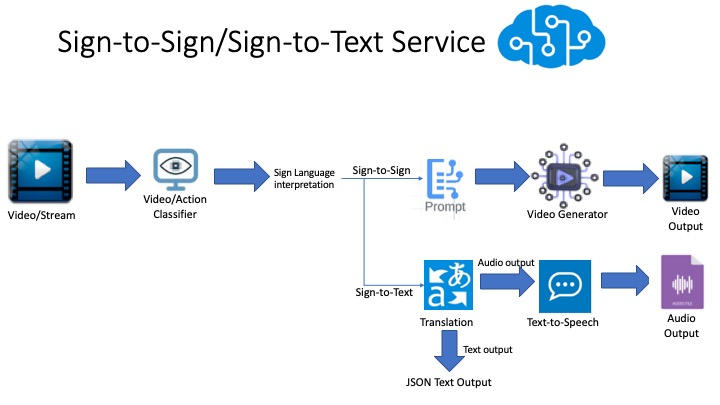

## For this demo, we will focus on interpreting American Sign Language (ASL) into Chinese Sign Language (CSL) and Spanish Sign Language (SSL).

### Import required libaries

In [ ]:
import requests
import os
from IPython.display import Video

## STS/STT Parameters
### There are four input parameters for the service:
- **source** - the source language for translation (asl)
- **target** - the target language for translation (ssl | csl) 
- **output_format** - the desired output format for the translation (sign_lanague | text | speech |)
- **video_uri** - the uri of a jsonl file in cloud object storage containing path and info of a video containing sign lanuguage

For this demo, we provide a uri of a person signing "hello" and "how are you" in ASL 
- "gs://asl_signed_videos/hello_video_prediction.jsonl"
- "gs://asl_signed_videos/how_are_you_video_prediction.jsonl"

# Enable Sign Language to Sign Language translation

In [ ]:
payload = {'source': 'asl', 'target': 'ssl', 'output_format': 'sign_language', 'video_uri': 'gs://asl_signed_videos/hello_video_prediction.jsonl'}

## Call the `sign_translation` endpoint to begin translation from ASL to SSL

In [ ]:
url = 'http://localhost:5000/sign_translation'

r = requests.post(url, json=payload)

## Get the translated sign language output

In [ ]:
with open('output.mp4', 'wb') as f:
    for chunk in r.iter_content(chunk_size=128):
        f.write(chunk)

In [ ]:
Video("output.mp4")

## Change the above payload `target` parameter to `zh` and rerun to see the CSL intrepretation

# Now let's enable Sign language to Speech
### modify the output format to `speech`. You should hear the translation in the target language, but the bytes to save as an audio file are returned from the service as well

In [ ]:
payload = {'source': 'asl', 'target': 'csl', 'output_format': 'speech', 'video_uri': 'gs://asl_signed_videos/how_are_you_video_prediction.jsonl'}

In [ ]:
r = requests.post(url, json=payload)

# Finally, enable Sign Language to Text

In [ ]:
payload = {'source': 'asl', 'target': 'ssl', 'output_format': 'text','video_uri': 'gs://asl_signed_videos/how_are_you_video_prediction.jsonl'}

In [ ]:
r = requests.post(url, json=payload)

In [ ]:
r.json()